# Training model for aggressive behavior prediction based on SEPP

COMBIOS RESEARCH GROUP


In [ ]:
#Open_CP
!pip install https://github.com/QuantCrimAtLeeds/PredictCode/zipball/master
#SEPP
!pip install https://github.com/MatthewDaws/SEPP/zipball/master

In [3]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import datetime
import numpy as np
import pyproj
import dateutil.parser
import descartes
import math
import csv

import matplotlib.pyplot as plt
import matplotlib.collections

# Librerias creadas por QuantCrimAtLeeds grupo de investigacion crimen de la universidad de Leeds U.K.
# https://github.com/QuantCrimAtLeeds/PredictCode
import open_cp
import open_cp.plot
import open_cp.geometry
import open_cp.predictors
import open_cp.sources.sepp

import open_cp.seppexp as seppexp
from open_cp import evaluation
import open_cp.sepp as sepp

Failed to import `rtree`.
Failed to import `rtree`.


## Data selection for training stage

In [4]:
path = '/Users/anamaria/Desktop/dev/security_project'

In [5]:
df = pd.read_csv(path+'/datasets/verify_enrich_nuse_29112019.csv')

In [6]:
import open_cp.sepp as sepp
import pickle
import pandas as pd

def selectData(nameLoc,dateIni,dateEnd):
    dfloc = df[df["LOCALIDAD"]==nameLoc]
    dfloc["FECHA_HORA"]=dfloc["HORA"].astype(str)
    valHour = dfloc["FECHA_HORA"].values
    valDate = dfloc["FECHA"].values
    timesVals = [];
    k = 0;
    for i in valHour:
        if len(i)<=2:
            timeStr = valDate[k] +" " + "00:"+i+":00"
        else:
            timeStr = valDate[k] +" " + i[:-2]+":"+i[-2:]+":00"
        
        k = k + 1

        timesVals.append(timeStr)
    dfloc["FECHA_HORA"] = timesVals;
    
    dfloc["FECHA_HORA_TS"] = dfloc.FECHA_HORA.map(dateutil.parser.parse)
    dfFilter = dfloc[(dfloc.FECHA_HORA_TS > dateIni) & (dfloc.FECHA_HORA_TS < dateEnd)]
    timestamps = dfFilter.FECHA_HORA_TS
    
    print("TimeStamps")
    print(type(timestamps))

    xcoords, ycoords = (dfFilter.LONGITUD.values,dfFilter.LATITUD.values)
    proj = pyproj.Proj(init="EPSG:3116")
    xcoords, ycoords = proj(xcoords,ycoords)
    
    points_train = open_cp.TimedPoints.from_coords(timestamps, xcoords, ycoords)
    return (points_train,timestamps,xcoords, ycoords)

def trainModel(nameLoc,dateIni,dateEnd):
    points_train,timestamps,xcoords, ycoords = selectData(nameLoc,dateIni,dateEnd)
    import matplotlib.pyplot as plt
    plt.scatter(xcoords, ycoords)
    print([timestamps])
    trainer = sepp.SEPPTrainer()
    trainer.data = points_train
    trainer.space_cutoff = 1000
    trainer.time_cutoff = datetime.timedelta(days=90)
    print(len(xcoords))
    predictor = trainer.train()
    return predictor 

## Training model for a specific localidad

/Users/anamaria/Desktop/dev/security_project/security_venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/anamaria/Desktop/dev/security_project/security_venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/anamaria/Desktop/dev/security_project/security_venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

TimeStamps
<class 'pandas.core.series.Series'>
[191      2017-01-01 20:55:00
202      2017-01-01 21:23:00
224      2017-01-01 07:21:00
247      2017-01-01 12:14:00
250      2017-01-01 18:43:00
                 ...        
699914   2017-01-12 13:22:00
699918   2017-01-12 18:53:00
699928   2017-01-12 10:52:00
699983   2017-01-13 22:37:00
700084   2017-01-14 22:03:00
Name: FECHA_HORA_TS, Length: 339, dtype: datetime64[ns]]
339


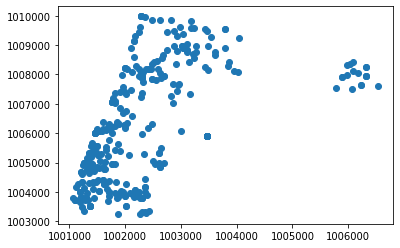

In [7]:
predictor1 = trainModel("CHAPINERO",'2017-01-01','2017-01-15')
outfile1 = open(path+'/aggressive_behavior_model/SEPP/'+'pkl/TrainRina'+'Chapinero2'+'.pkl','wb')
pickle.dump(predictor1, outfile1)
outfile1.close() 

## Training model for all localidades

In [8]:
localidades_list = list(df.LOCALIDAD.unique())
localidades_list.remove('SIN LOCALIZACION')

In [9]:
initial_date = '2017-01-01'
final_date = '2017-03-30'

ANTONIO NARIÑO


/Users/anamaria/Desktop/dev/security_project/security_venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/anamaria/Desktop/dev/security_project/security_venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/anamaria/Desktop/dev/security_project/security_venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

TimeStamps
<class 'pandas.core.series.Series'>
[0        2017-03-02 00:03:00
381      2017-01-01 13:19:00
486      2017-01-01 06:59:00
508      2017-01-01 22:32:00
641      2017-01-01 18:07:00
                 ...        
707949   2017-03-26 03:47:00
708018   2017-03-26 07:39:00
708124   2017-03-27 17:49:00
708193   2017-03-28 22:24:00
708340   2017-03-29 21:06:00
Name: FECHA_HORA_TS, Length: 1537, dtype: datetime64[ns]]
1537


ValueError: 0 standard deviation: [13270.23208956     0.             0.        ]

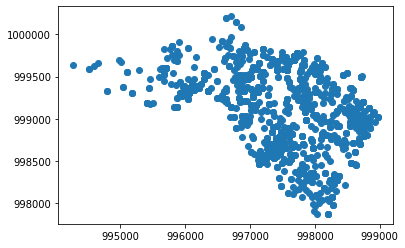

In [10]:
for localidad in localidades_list:
    print(localidad)
    localidad_predictor = trainModel(localidad, initial_date, final_date)
    localidad_outfile = open(path+'/aggressive_behavior_model/SEPP/'+'pkl/TrainRina'+str(localidad)+'.pkl','wb')
    pickle.dump(localidad_predictor, localidad_outfile)
    localidad_outfile.close() 